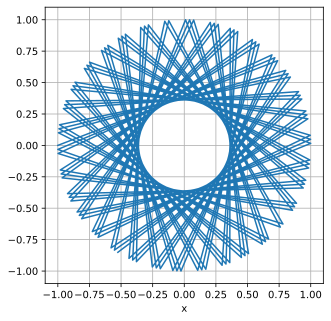

In [6]:
%matplotlib inline
import mxnet as mx
from mxnet import autograd, nd, np, npx 
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
    
    
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

npx.set_np()
x = np.arange(-3.0, 3.0, 0.59)
 
# 创建一个圆的数据
theta = np.linspace(400, 5 * np.pi, 100)  # 生成0到2π的角度值
r = 1.0  # 圆的半径

# 计算圆的x和y坐标
x = r * np.cos(theta)
y = r * np.sin(theta)
# y = np.pi * np.power(x,2)

# x.attach_grad()
# with autograd.record():
#     y = npx.relu(x)
# y.backward()

# # 创建一个包含两个子图的图表
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# plot(x, y, 'x', 'relu(x)', figsize=(5,3.5),axes=axes[0])
# plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 3.5),axes=axes[1])


# with autograd.record():
#     y = npx.sigmoid(x)
# y.backward()
# plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 3.5),axes=axes[2])
# plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 3.5),axes=axes[3])
# 调整子图之间的间距
plot(x, y, 'x', '', figsize=(5, 5),axes= axes)
 
# plt.tight_layout()

# 显示图表
plt.show()

